In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import warnings
warnings.simplefilter(action='ignore')
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)
%matplotlib inline

In [17]:
df = pd.read_csv('Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [18]:
df.drop(columns=['Unnamed: 0', 'flight'], inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


In [20]:
df.isnull().values.any()

False

In [21]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [22]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


****************************************************************************************************
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64


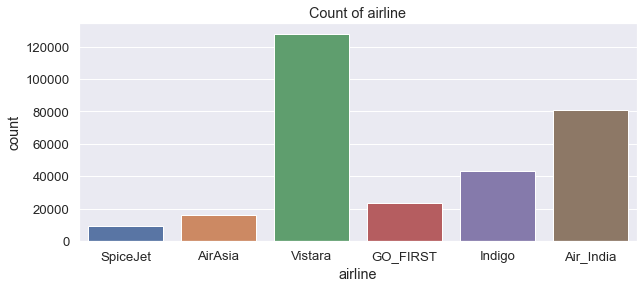

****************************************************************************************************
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64


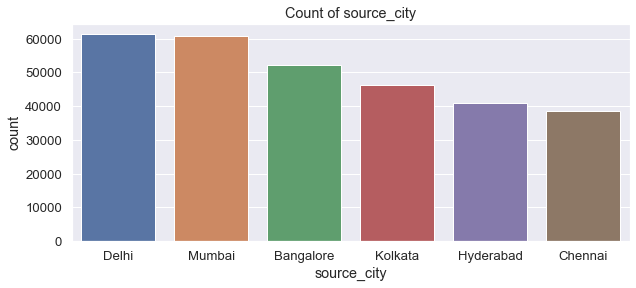

****************************************************************************************************
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64


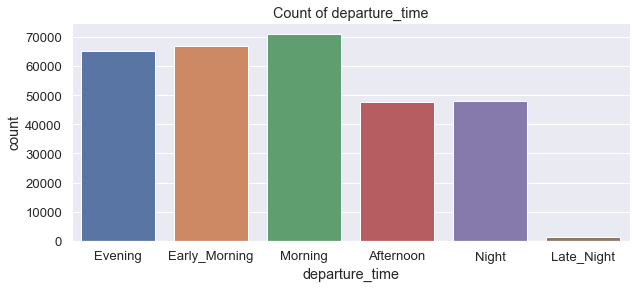

****************************************************************************************************
one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64


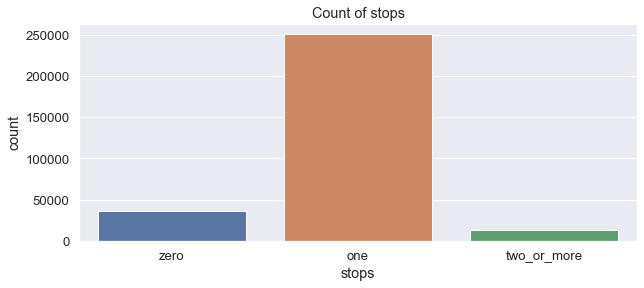

****************************************************************************************************
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64


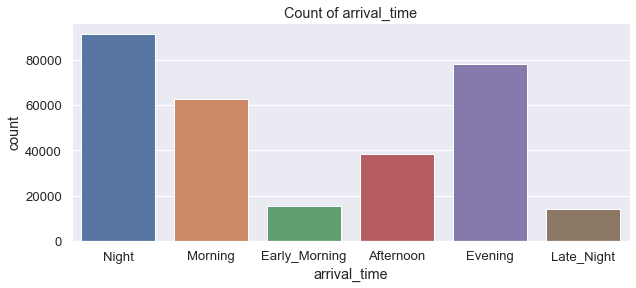

****************************************************************************************************
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64


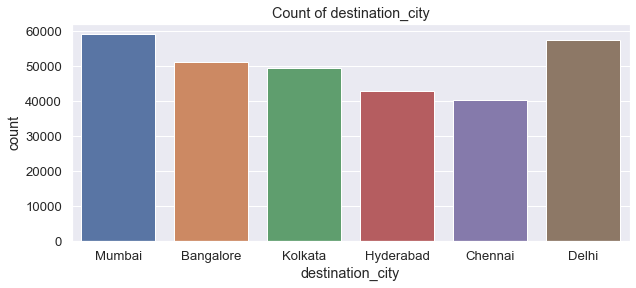

****************************************************************************************************
Economy     206666
Business     93487
Name: class, dtype: int64


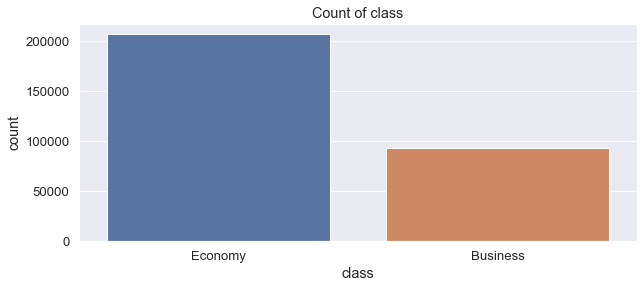

In [23]:
for col in df.select_dtypes('O'):
    print('*'*100)
    print(df[col].value_counts())
    plt.figure(figsize=(10,4))
    sns.countplot(df[col])
    plt.title(f'Count of {col}')
    plt.show()

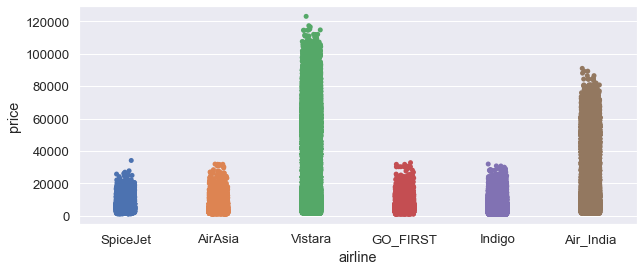

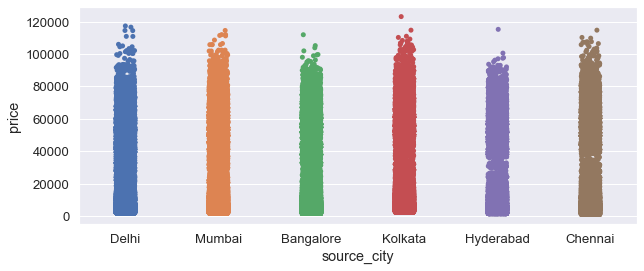

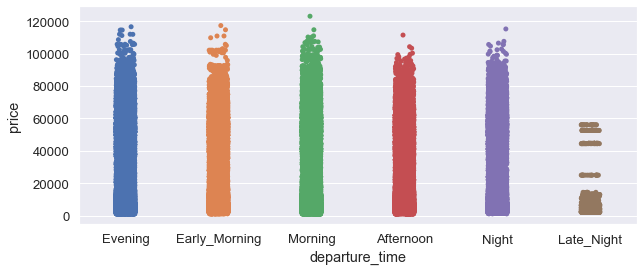

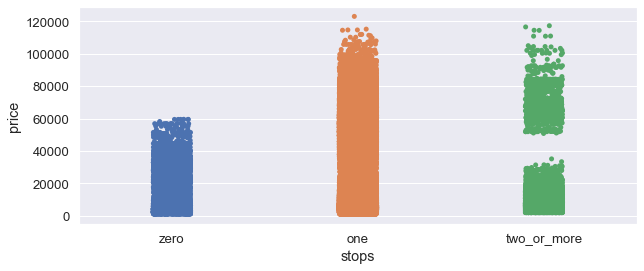

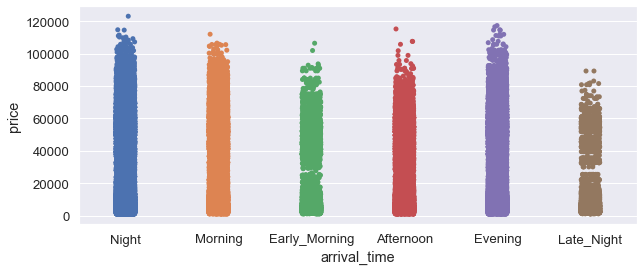

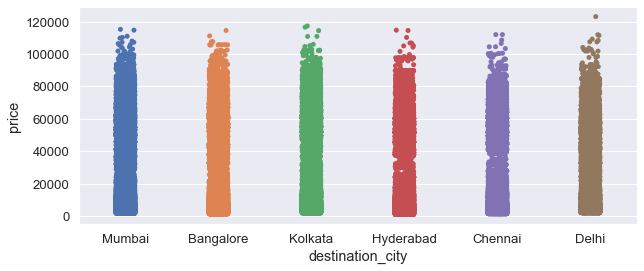

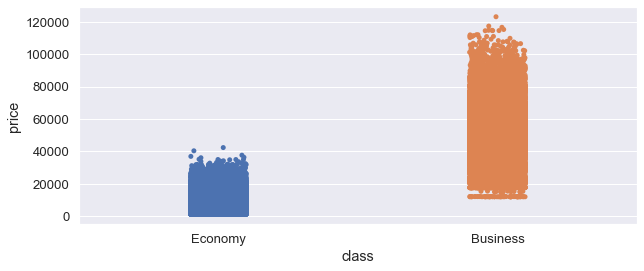

In [24]:
for col in df.select_dtypes('O'):
    plt.figure(figsize=(10,4))
    sns.stripplot(x= df[col], y= df['price'])
    plt.show()

In [25]:
df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

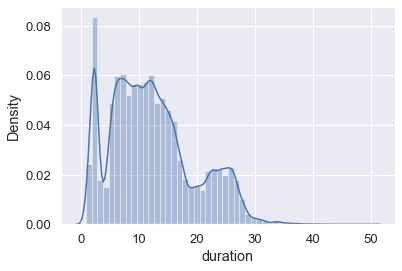

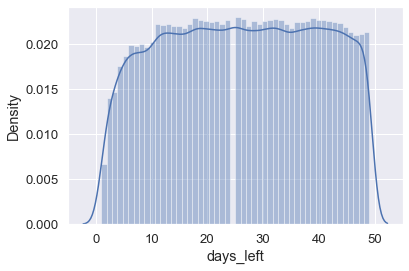

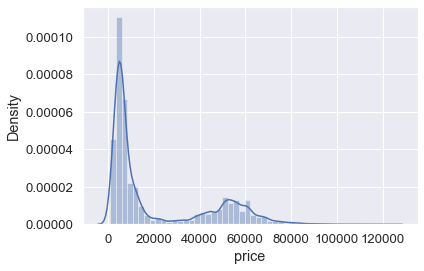

In [26]:
for col in df.columns[7:]:
    sns.distplot(df[col])
    plt.show()

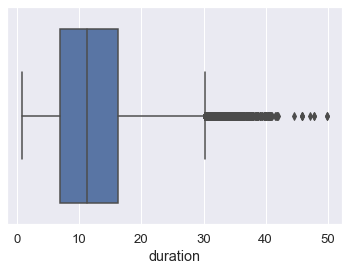

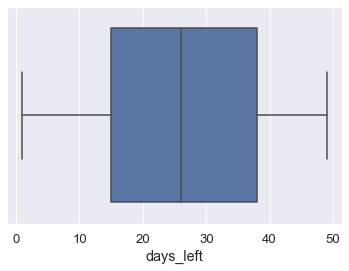

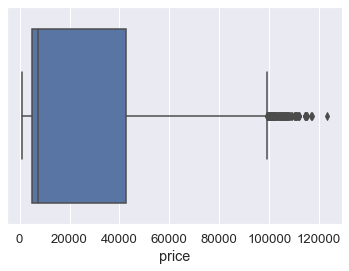

In [27]:
for col in df.columns[7:]:
    sns.boxplot(df[col])
    plt.show()

In [28]:
df[df['duration']>30]

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
114,Air_India,Delhi,Morning,one,Afternoon,Mumbai,Economy,30.08,1,24540
357,Air_India,Delhi,Morning,one,Afternoon,Mumbai,Economy,30.08,3,15405
546,Air_India,Delhi,Morning,one,Afternoon,Mumbai,Economy,30.08,4,15720
724,Air_India,Delhi,Morning,one,Afternoon,Mumbai,Economy,30.08,5,15405
907,Air_India,Delhi,Morning,one,Afternoon,Mumbai,Economy,30.08,6,15405
...,...,...,...,...,...,...,...,...,...,...
296064,Air_India,Chennai,Early_Morning,one,Afternoon,Kolkata,Business,30.33,5,55377
296297,Air_India,Chennai,Early_Morning,one,Afternoon,Kolkata,Business,30.33,10,55377
296391,Air_India,Chennai,Early_Morning,one,Afternoon,Kolkata,Business,30.33,12,55377
296716,Air_India,Chennai,Early_Morning,one,Afternoon,Kolkata,Business,30.33,19,55377


In [29]:
df[df['price']>=100000]

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
215858,Vistara,Delhi,Evening,two_or_more,Evening,Kolkata,Business,21.08,1,114434
215859,Vistara,Delhi,Evening,two_or_more,Evening,Kolkata,Business,21.08,1,116562
216025,Vistara,Delhi,Evening,two_or_more,Morning,Kolkata,Business,17.58,4,100395
216095,Vistara,Delhi,Morning,one,Evening,Kolkata,Business,8.00,5,101369
216096,Vistara,Delhi,Early_Morning,two_or_more,Evening,Kolkata,Business,10.92,5,117307
...,...,...,...,...,...,...,...,...,...,...
293474,Vistara,Chennai,Morning,one,Night,Bangalore,Business,9.67,3,107597
296001,Vistara,Chennai,Night,one,Morning,Kolkata,Business,11.50,3,102832
296081,Vistara,Chennai,Early_Morning,one,Night,Kolkata,Business,15.83,5,102384
296170,Vistara,Chennai,Night,one,Morning,Kolkata,Business,11.50,7,104624


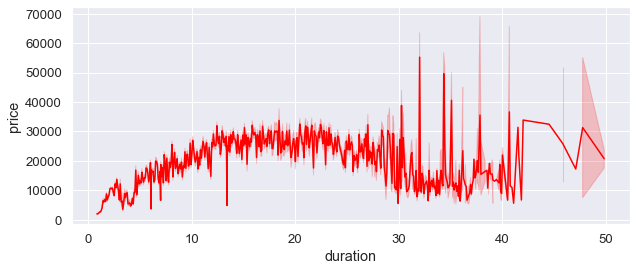

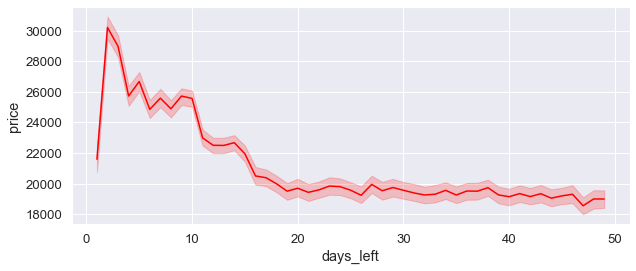

In [30]:
for col in df.columns[7:9]:
    plt.figure(figsize=(10,4))
    sns.lineplot(x= df[col], y=df['price'], color='red')
    plt.show()

In [31]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [33]:
df = pd.get_dummies(df)

In [34]:
df.head()

,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,2.17,1,5953,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,2.33,1,5953,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
2,2.17,1,5956,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2.25,1,5955,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,2.33,1,5955,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1


In [38]:
x = df.drop('price', axis=1) 
y = df['price']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=170)

In [40]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [52]:
models = {
    "LR": LinearRegression(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor()
}

In [53]:
for name, model in models.items():
    print('-'*30)
    print(f'Using model: {name}')
    
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    
    y_pred = model.predict(x_test)
    print(f'Test Score: {r2_score(y_test, y_pred)}')  

------------------------------
Using model: LR
Training Score: 0.9115677651545016
Test Score: 0.9109826247091852
------------------------------
Using model: DT
Training Score: 0.9992557953688659
Test Score: 0.9766599148125201
------------------------------
Using model: RF
Training Score: 0.9974916779786861
Test Score: 0.9854237204094989
------------------------------
Using model: XGBR
Training Score: 0.9782890513308646
Test Score: 0.9772226142403136
